# Задача 4. Максимум элементов после нулей

In [1]:
import task4
import numpy as np
import IPython

## Тестирование реализаций с помощью unittest

In [2]:
import unittest

### I вариант - без векторизации

In [3]:
class TestNvec(unittest.TestCase):
    def test_prim(self):
        """ Primitive test to check the correctness of solution"""
        x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
        answer = 5
        
        self.assertEqual(task4.maxn_nvec(x), answer)
        
    def test_big(self):
        """ Test to check solution on big data"""
        x = []
        for i in range(141):
            x.append(i)
            x.append(0)
            x.append(-i)
            x.append(0)
        x = np.array(x)
        answer = 140
        self.assertEqual(task4.maxn_nvec(x), answer)
        
    def test_rand(self):
        """ Test to check solution on random data"""
        x = np.random.randint(-140, 140, size = 281)
        answer = -141
        
        for idx in range(1, len(x)):
            if answer < x[idx] and x[idx-1] == 0:
                answer = x[idx]
        self.assertEqual(task4.maxn_nvec(x), answer)

In [4]:
test_nvec = TestNvec()
suite_nvec = unittest.TestLoader().loadTestsFromModule(test_nvec)
print (unittest.TextTestRunner().run(suite_nvec))

...

<unittest.runner.TextTestResult run=3 errors=0 failures=0>



----------------------------------------------------------------------
Ran 3 tests in 0.008s

OK


### II вариант - с векторизацией

In [5]:
class TestVec(unittest.TestCase):
    def test_prim(self):
        """ Primitive test to check the correctness of solution"""
        x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
        answer = 5
        
        self.assertEqual(task4.maxn_vec(x), answer)
        
    def test_big(self):
        """ Test to check solution on big data"""
        x = []
        for i in range(141):
            x.append(i)
            x.append(0)
            x.append(-i)
            x.append(0)
        x = np.array(x)
        answer = 140
        self.assertEqual(task4.maxn_vec(x), answer)
        
    def test_rand(self):
        """ Test to check solution on random data"""
        x = np.random.randint(-140, 140, size = 281)
        answer = -141
        
        for idx in range(1, len(x)):
            if answer < x[idx] and x[idx-1] == 0:
                answer = x[idx]
        self.assertEqual(task4.maxn_vec(x), answer)

In [6]:
test_vec = TestVec()
suite_vec = unittest.TestLoader().loadTestsFromModule(test_vec)
print (unittest.TextTestRunner().run(suite_vec))

...

<unittest.runner.TextTestResult run=3 errors=0 failures=0>



----------------------------------------------------------------------
Ran 3 tests in 0.008s

OK


### III вариант - гибридная реализация

In [7]:
class TestHybr(unittest.TestCase):
    def test_prim(self):
        """ Primitive test to check the correctness of solution"""
        x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
        answer = 5
        
        self.assertEqual(task4.maxn_hybr(x), answer)
        
    def test_big(self):
        """ Test to check solution on big data"""
        x = []
        for i in range(141):
            x.append(i)
            x.append(0)
            x.append(-i)
            x.append(0)
        x = np.array(x)
        answer = 140
        self.assertEqual(task4.maxn_hybr(x), answer)
        
    def test_rand(self):
        """ Test to check solution on random data"""
        x = np.random.randint(-140, 140, size = 281)
        answer = -141
        
        for idx in range(1, len(x)):
            if answer < x[idx] and x[idx-1] == 0:
                answer = x[idx]
        self.assertEqual(task4.maxn_hybr(x), answer)

In [8]:
test_hybr = TestHybr()
suite_hybr = unittest.TestLoader().loadTestsFromModule(test_hybr)
print (unittest.TextTestRunner().run(suite_hybr))

...

<unittest.runner.TextTestResult run=3 errors=0 failures=0>



----------------------------------------------------------------------
Ran 3 tests in 0.008s

OK


## Дискретные тесты (на основе тестов из unittest)

### I вариант - без векторизации

In [3]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
%timeit maxn_nvec(x)

rx = np.random.randint(-140, 140, size = 281)
%timeit maxn_nvec(rx)

x = []
for i in range(141):
    x.append(i)
    x.append(0)
    x.append(-i)
    x.append(0)
x = np.array(x)    

%timeit maxn_nvec(x)

The slowest run took 6.44 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.25 µs per loop
10000 loops, best of 3: 52.8 µs per loop
1000 loops, best of 3: 225 µs per loop


### II вариант - с векторизацией

In [4]:
def maxn_vec (x):
    indices = np.where(x==0)
    indices += np.ones(len(indices))
    indices = indices[indices < len(x)]
    return max(x[indices.astype(np.int64)])

In [5]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
%timeit maxn_vec(x)

%timeit maxn_vec(rx)

x = []
for i in range(141):
    x.append(i)
    x.append(0)
    x.append(-i)
    x.append(0)
x = np.array(x)    

%timeit maxn_vec(x)

The slowest run took 5.63 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 28.6 µs per loop
10000 loops, best of 3: 26 µs per loop
10000 loops, best of 3: 48.6 µs per loop


### III вариант - гибридная реализация

In [6]:
def maxn_hybr (x):
    max_val = 0
    was_found = False
    for i in range(1, len(x)):
        if x[i-1] == 0:
            if x[i] > max_val or was_found is False:
                max_val = x[i]
                was_found = True
                
    return max_val

In [7]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
%timeit maxn_hybr(x)

%timeit maxn_hybr(rx)

x = []
for i in range(141):
    x.append(i)
    x.append(0)
    x.append(-i)
    x.append(0)
x = np.array(x)    

%timeit maxn_hybr(x)

The slowest run took 6.68 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.09 µs per loop
10000 loops, best of 3: 57.2 µs per loop
10000 loops, best of 3: 180 µs per loop


## Непрерывные тесты

In [2]:
import time
import matplotlib.pyplot as plt

In [26]:
def get_measures (begin, end, step):
    x_axis = []
    nvec_dots = []
    vec_dots = []
    hybr_dots = []
    start = time.time()
    x = []
    for i in range(begin-1):
        x.append(i)
        x.append(0)
        x.append(-i)
        x.append(0)
    
    curr_i = begin
    for i in range (begin, end, step):
        
        for j in range(curr_i, i):
            x.append(j)
            x.append(0)
            x.append(-j)
            x.append(0)
            
        curr_i = i
        x_axis.append(i)
        
        start = time.time()
        task4.maxn_nvec(np.array(x).astype(np.int64) )
        nvec_dots.append(time.time()-start)

        start = time.time()
        task4.maxn_vec(np.array(x).astype(np.int64))
        vec_dots.append(time.time()-start)

        start = time.time()
        task4.maxn_hybr(np.array(x).astype(np.int64))
        hybr_dots.append(time.time()-start)
    
    return (x_axis, nvec_dots, vec_dots, hybr_dots)

In [27]:
x_axis, nvec_dots, vec_dots, hybr_dots = get_measures (25, 1250, 25)

plt.plot(x_axis, nvec_dots, "r-", label="non-vectorized", antialiased=False)
plt.plot(x_axis, vec_dots, "g-", label="vectorized", antialiased=False)
plt.plot(x_axis, hybr_dots, "b-", label="hybrid", antialiased=False)
plt.xlabel("vector length")
plt.ylabel("time(sec)")
plt.legend()
plt.show()

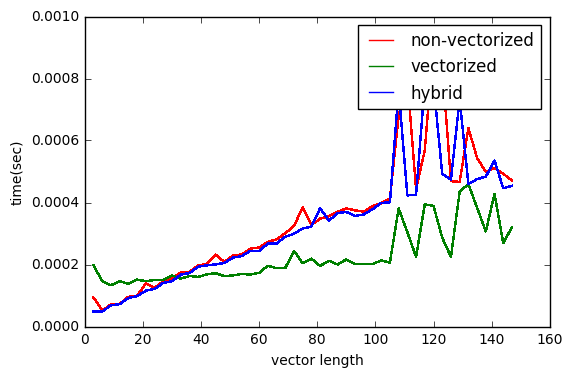

In [28]:
x_axis, nvec_dots, vec_dots, hybr_dots = get_measures (3, 150, 3)

plt.plot(x_axis, nvec_dots, "r-", label="non-vectorized", antialiased=False)
plt.plot(x_axis, vec_dots, "g-", label="vectorized", antialiased=False)
plt.plot(x_axis, hybr_dots, "b-", label="hybrid", antialiased=False)
plt.xlabel("vector length")
plt.ylabel("time(sec)")
plt.legend()
plt.show()